In [29]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf
plt.rcParams["font.size"]=13
plt.rcParams["figure.figsize"]=(10,8)

In [30]:
EXTENT = [-20, 20, -20, 20]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]

In [31]:
data = sdf.read(all_files[0])

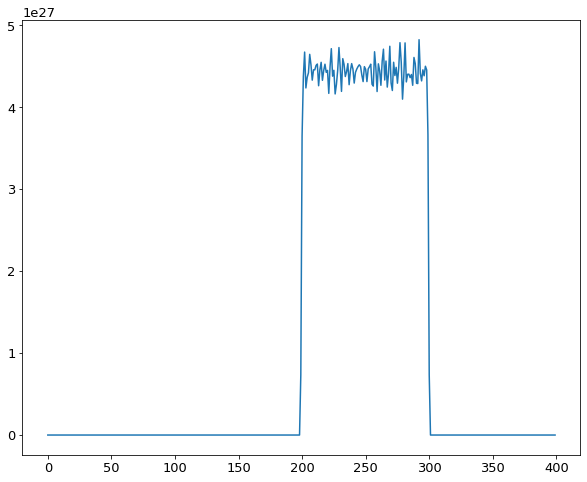

In [32]:
plt.plot(data.Derived_Number_Density_Electron.data)

In [33]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field

In [34]:
Ey = get_field(40)

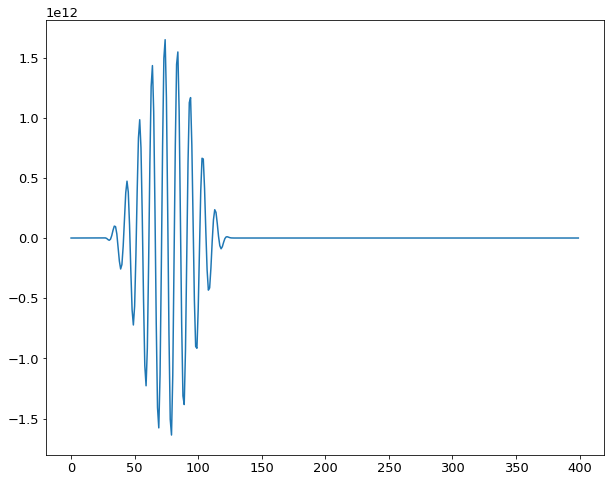

In [35]:
# plt.figure(figsize=(8, 8))
plt.plot(Ey)

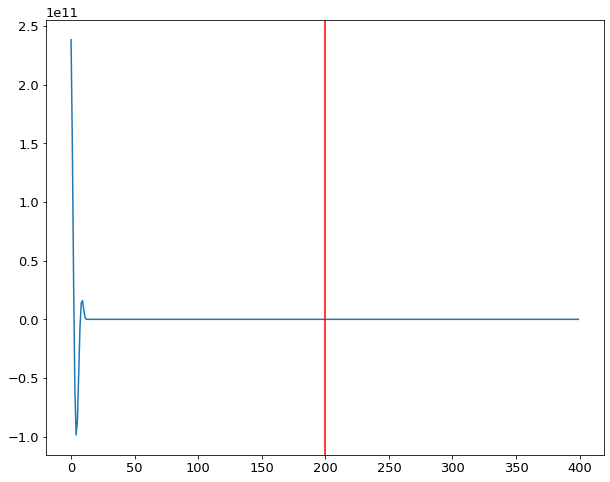

In [36]:
Ey = get_field(1)
plt.plot(Ey)
plt.axvline(200, color="red")
plt.show()

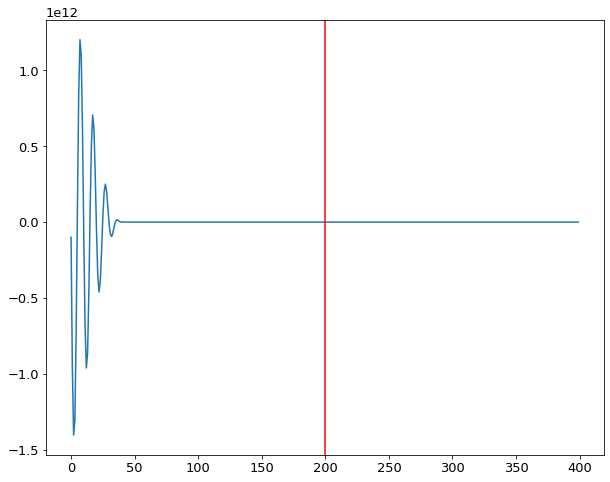

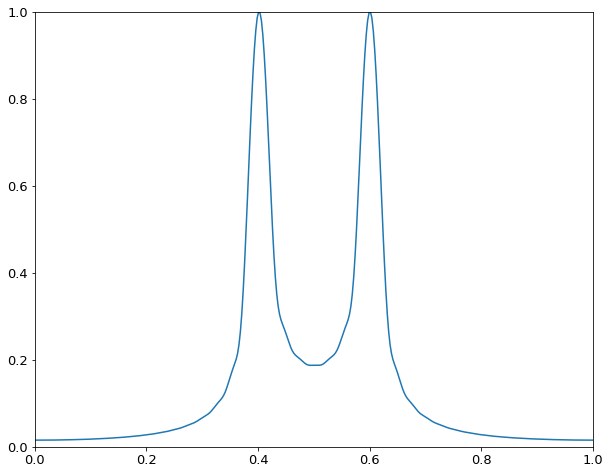

In [37]:
Ey = get_field(10)
plt.plot(Ey)
plt.axvline(200, color="red")
plt.show()

Ey_f = np.abs(np.fft.fft(Ey))
Ey_f = np.fft.fftshift(Ey_f)
plt.plot(np.linspace(0, 1, 400), Ey_f/np.max(Ey_f))
plt.axvline(200, color="red")
plt.xlim(0,1)
plt.ylim(0,1);

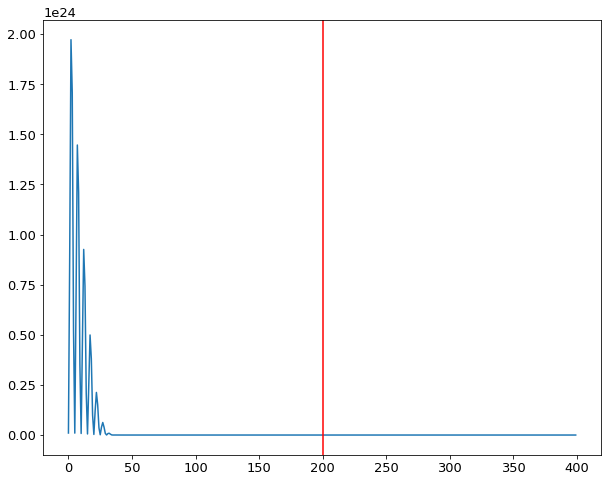

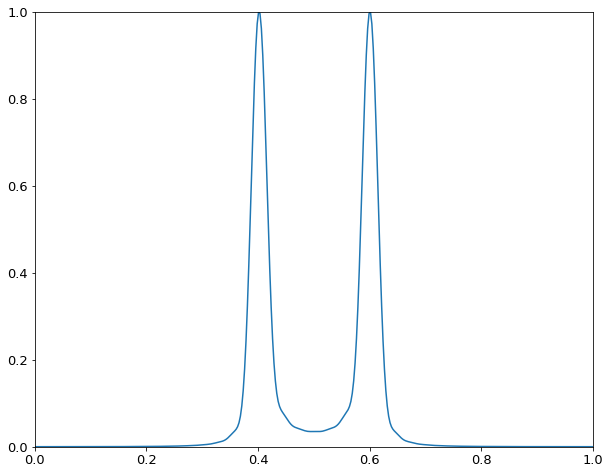

In [38]:
Ey = get_field(10)
plt.plot(Ey**2)
plt.axvline(200, color="red")
plt.show()

Ey_f = np.abs(np.fft.fft(Ey))
Ey_f = np.fft.fftshift(Ey_f)
plt.plot(np.linspace(0, 1, 400), Ey_f**2/np.max(Ey_f**2))
plt.axvline(200, color="red")
plt.xlim(0,1)
plt.ylim(0,1);

In [39]:
def p1(x):
    if x>0:
        return 1
    return 0

def p2(x):
    if x>10:
        return 0
    return 1

In [41]:
Et1 = []
Et2 = []
d = []
all_field = []
for i in range(len(all_files)):
    data = get_field(i)
    all_field.append(data)
    Et1.append(data[50])
    Et2.append(data[170])
    data = sdf.read(all_files[i])
    d.append(data.Derived_Number_Density_Electron.data)

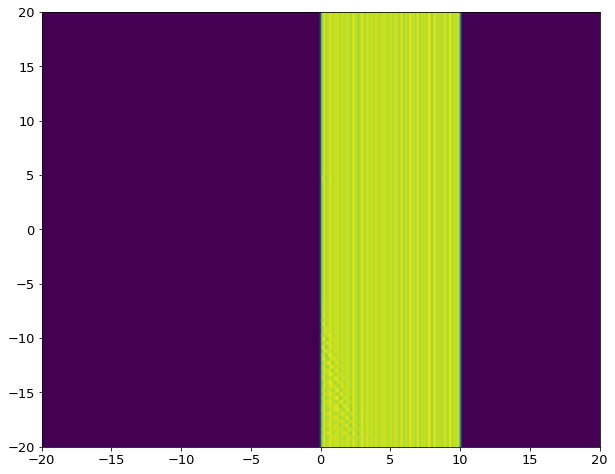

In [58]:
plt.imshow(d/np.max(d), aspect="auto", extent=EXTENT)


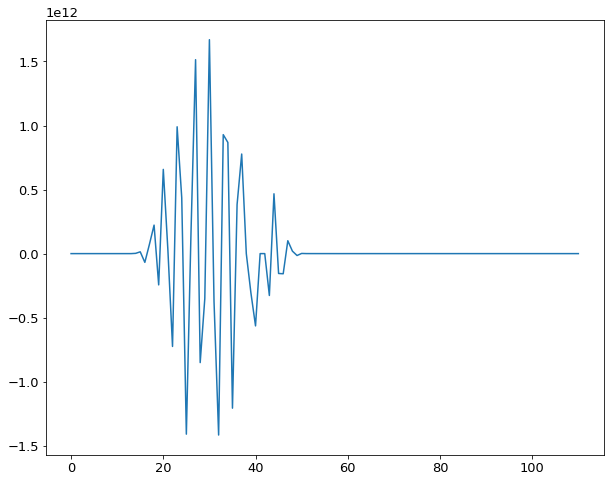

In [43]:
plt.plot(Et1)

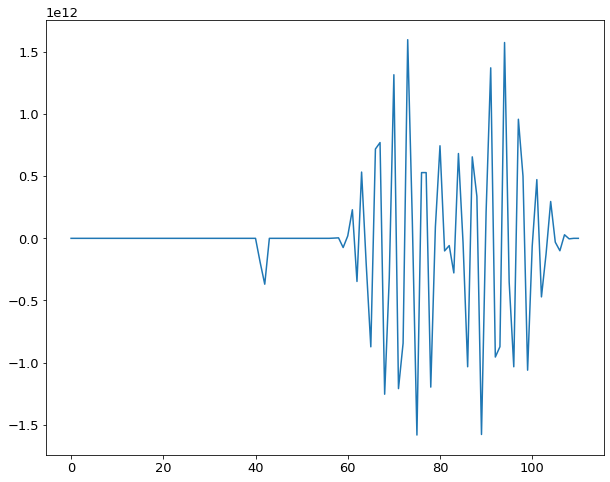

In [44]:
plt.plot(Et2)

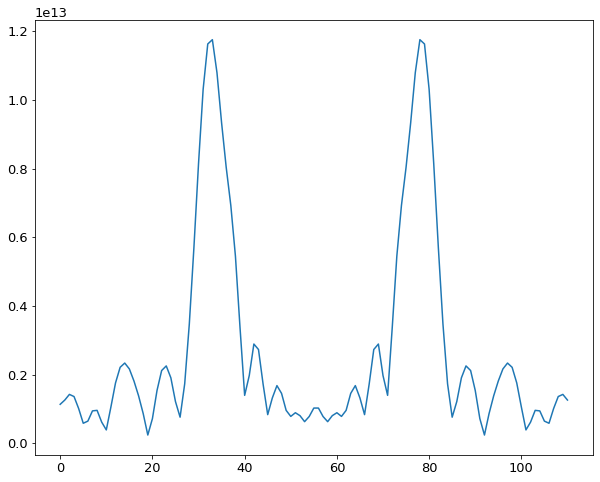

In [45]:
plt.plot(np.abs(np.fft.fft(Et1)))

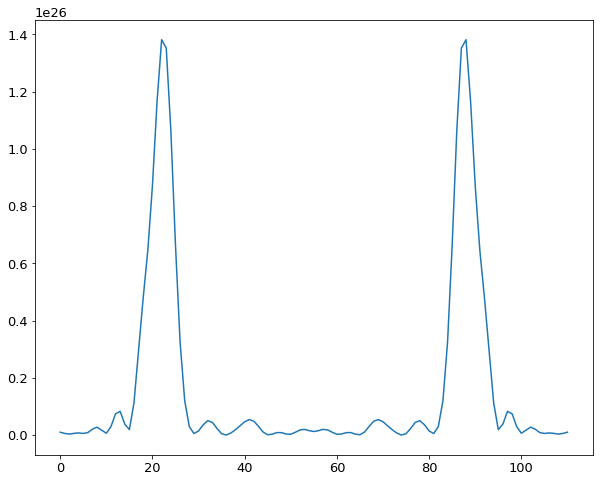

In [48]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2)

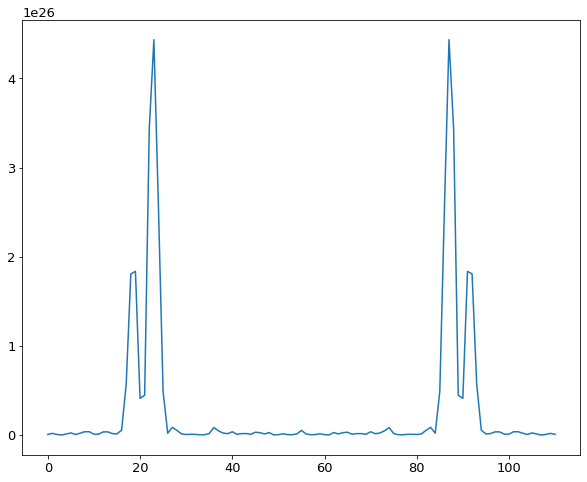

In [50]:
eyt = np.abs(np.fft.fft(np.array(Et2)))
eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2)